In [1]:
# data_20

In [72]:
import os
import sys
import time
import warnings
import platform
from datetime import datetime,timedelta

# Basic Data Analysis Tools
import numpy as np
import pandas as pd

# https://financedata.github.io/posts/finance-data-reader-users-guide.html
# import FinanceDataReader as fdr

# Exploratory Data Analysis (EDA)
import matplotlib as mpl
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt
# import missingno as msno
import plotly.offline as offline
import plotly.graph_objs as go
import scipy as sp

# Data Preprocessing and Cleansing
from sklearn.preprocessing import LabelEncoder
from scipy.integrate import quad

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

# Train / Test Dataset
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Machine Learning Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from vecstack import stacking

# Hyper Param Optimization
from sklearn.model_selection import GridSearchCV

# testing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# from sklearn.externals import joblib 
from dateutil.relativedelta import *
import datetime, time

In [3]:
# pd.options.display.max_rows = 999
# pd.options.display.max_columns = 100

In [150]:
# 씨아이에스, 엘앤에프, 이엔에프테크놀로지, 코스모신소재, 피앤이솔루션
company = '엘앤에프'

In [151]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
data = pd.read_csv('data_{}.csv'.format(company),thousands=',',index_col=0)
# rl_data = pd.read_csv('rl_data.csv',thousands=',',index_col=0)
data.head()

,adjusted_price,volumne(mean_5d)(week),volumne(week),price_nickel,change_nickel,%change_nickel,stock_nickel,index_mineral,change_mineral,%change_mineral,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-02,6620.0,41955.0,21035.0,9745.0,-195.0,-1.96,454044.0,1148.31,10.27,0.90,...,-0.073053,-1.0,1.0,-1.0,0.017936,-0.095203,0.989368,0.211175,-0.424009,-0.102817
2015-09-03,6720.0,32943.0,28537.0,10025.0,280.0,2.87,453678.0,1144.66,-3.65,-0.32,...,-0.033593,-1.0,1.0,-1.0,0.059140,-0.075811,0.983854,0.173015,-0.390515,-0.064312
2015-09-04,6590.0,34406.0,44316.0,9785.0,-240.0,-2.39,453630.0,1159.38,14.72,1.29,...,-0.051283,-1.0,1.0,-1.0,-0.006614,-0.151631,0.985965,0.180689,-0.450559,-0.106300
2015-09-07,6540.0,31191.0,17586.0,9810.0,25.0,0.26,451962.0,1147.53,-11.85,-1.02,...,-0.097673,-1.0,1.0,-1.0,0.021594,-0.070602,1.000000,0.161876,-0.442746,-0.116600
2015-09-08,6340.0,26272.0,19887.0,9850.0,40.0,0.41,451356.0,1144.81,-2.72,-0.24,...,-0.056254,-1.0,1.0,-1.0,0.075952,-0.060893,1.000000,0.173937,-0.396206,-0.056553


In [153]:
company = '엘앤에프'
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
data = pd.read_csv('data_{}.csv'.format(company),thousands=',',index_col=0)
# rl_data = pd.read_csv('rl_data.csv',thousands=',',index_col=0)
data.head()

event_new = pd.read_excel(f"event_embbed_with_tech_no_{company}.xlsx", index_col = 0)
data = data.drop([f'event{i}' for i in range(1, 17)], axis=1)
data = data.reset_index()
data['Date'] = pd.to_datetime(data.Date)
event_new.rename(columns = {'date' : 'Date'}, inplace=True)
data = pd.merge(data, event_new[[f'event{i}' for i in range(1, 17)] + ['Date']], on = ['Date'], how='left')
data = data.set_index('Date')

In [154]:
data.columns

Index(['adjusted_price', 'volumne(mean_5d)(week)', 'volumne(week)',
       'price_nickel', 'change_nickel', '%change_nickel', 'stock_nickel',
       'index_mineral', 'change_mineral', '%change_mineral', 'major_mineral',
       'major_change_mineral', 'major_%chagne_mineral', 'price_co_lithum',
       'change_co_lithum', '%change_co_lithum', 'price_cobalt_LME',
       'change_cobalt_LME', '%change_cobalt_LME', 'kospi', 'kosdaq',
       '%change_usd_krw', '%change_korean_bond', '%change_kospi_vol',
       'volume_brent', '%change_brent', 'volume_wti', '%change_wti', 'rsi_14',
       'macd', 'cci', 'adx', 'stoch_slowk', 'stoch_slowd', 'willr', 'momentum',
       'roc', 'ema20', 'adosc', 'obv', 'profit_rate', 'rate_rolling_3',
       'rate_rolling_5', 'rate_rolling_10', 'rate_rolling_30',
       'rate_rolling_120', 'rate_rolling_150', 'target', 'asset_merge',
       'profit_merge', 'kospi_vol_merge', 'ko_bond_merge', 'usd_krw_merge',
       'brent_merge', 'wti_merge', 'profit_mean3', 'bren

In [116]:
pne = ['rate_rolling_10',
 'change_nickel',
 's_niceel_std5',
 '%change_nickel',
 'volumne(week)',
 'volume_brent',
 'stoch_slowk',
 '%change_korean_bond',
 'volume_wti',
 'adx',
 'wti_std5',
 'volumne(mean_5d)(week)',
 '%change_usd_krw',
 'stoch_slowd',
 '%change_wti',
 'usd_krw_std5',
 'rate_rolling_3',
 'm_mineral_std5',
 '%change_kospi_vol',
 'p_nickel_std5',
 'kospi_vol_merge',
 'mineral_std5',
 'ko_bond_std5',
 '%change_brent',
 'kospivol_std5',
              'target',
       'profit_rate',
       'adjusted_price',
        'event1', 'event2', 'event3', 'event4', 'event5',
     'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
     'event13', 'event14', 'event15', 'event16']

In [117]:
lnf = ['%change_korean_bond',
 'p_nickel_std5',
 'rate_rolling_150',
 '%change_nickel',
 'stoch_slowd',
 'usd_krw_std5',
 'stoch_slowk',
 'change_nickel',
 'rate_rolling_5',
 'rate_rolling_3',
 'ko_bond_std5',
 'volume_wti',
 'mineral_std5',
 '%change_brent',
 'wti_std5',
 'rate_rolling_30',
 'kospivol_std5',
 'm_mineral_std5',
 's_niceel_std5',
 '%change_kospi_vol',
 'volumne(week)',
 'volume_brent',
 '%change_usd_krw',
              'target',
       'profit_rate',
       'adjusted_price',
        'event1', 'event2', 'event3', 'event4', 'event5',
     'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
     'event13', 'event14', 'event15', 'event16']

In [118]:
enf = ['rate_rolling_30',
 'p_nickel_std5',
 'rate_rolling_3',
 'volume_wti',
 'kospivol_std5',
 '%change_usd_krw',
 'mineral_std5',
 'ko_bond_std5',
 'change_nickel',
 'volumne(mean_5d)(week)',
 'volumne(week)',
 'adosc',
 's_niceel_std5',
 'volume_brent',
 'wti_std5',
 'rate_rolling_5',
 '%change_korean_bond',
 '%change_kospi_vol',
 'change_mineral',
 'usd_krw_std5',
 '%change_brent',
 'm_mineral_std5',
 'major_change_mineral',
              'target',
       'profit_rate',
       'adjusted_price',
        'event1', 'event2', 'event3', 'event4', 'event5',
     'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
     'event13', 'event14', 'event15', 'event16']

In [119]:
cosmo = ['volumne(week)',
 'wti_std5',
 'change_nickel',
 '%change_kospi_vol',
 'rate_rolling_120',
 '%change_usd_krw',
 'kospivol_std5',
 'rate_rolling_150',
 '%change_wti',
 'volume_brent',
 'ko_bond_std5',
 'm_mineral_std5',
 'brent_std5',
 '%change_korean_bond',
 'mineral_std5',
 'p_nickel_std5',
 '%change_brent',
 'rate_rolling_3',
 's_niceel_std5',
 'kospi_vol_merge',
 'volume_wti',
 'major_change_mineral',
                 'target',
       'profit_rate',
       'adjusted_price',
        'event1', 'event2', 'event3', 'event4', 'event5',
     'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
     'event13', 'event14', 'event15', 'event16']

In [155]:
cis = ['kospivol_std5',
 'p_nickel_std5',
 '%change_brent',
 'rate_rolling_10',
 'rate_rolling_30',
 'rate_rolling_3',
 'macd',
 'brent_std5',
 'wti_std5',
 '%change_wti',
 'volume_wti',
 '%change_korean_bond',
 'willr',
 'stoch_slowk',
 '%change_usd_krw',
 'volume_brent',
 'mineral_std5',
 'volumne(mean_5d)(week)',
 'usd_krw_std5',
 '%change_kospi_vol',
 'ko_bond_std5',
 'stoch_slowd',
 'm_mineral_std5',
              'target',
       'profit_rate',
       'adjusted_price',
        'event1', 'event2', 'event3', 'event4', 'event5',
     'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
     'event13', 'event14', 'event15', 'event16']

In [156]:
data.columns

Index(['adjusted_price', 'volumne(mean_5d)(week)', 'volumne(week)',
       'price_nickel', 'change_nickel', '%change_nickel', 'stock_nickel',
       'index_mineral', 'change_mineral', '%change_mineral', 'major_mineral',
       'major_change_mineral', 'major_%chagne_mineral', 'price_co_lithum',
       'change_co_lithum', '%change_co_lithum', 'price_cobalt_LME',
       'change_cobalt_LME', '%change_cobalt_LME', 'kospi', 'kosdaq',
       '%change_usd_krw', '%change_korean_bond', '%change_kospi_vol',
       'volume_brent', '%change_brent', 'volume_wti', '%change_wti', 'rsi_14',
       'macd', 'cci', 'adx', 'stoch_slowk', 'stoch_slowd', 'willr', 'momentum',
       'roc', 'ema20', 'adosc', 'obv', 'profit_rate', 'rate_rolling_3',
       'rate_rolling_5', 'rate_rolling_10', 'rate_rolling_30',
       'rate_rolling_120', 'rate_rolling_150', 'target', 'asset_merge',
       'profit_merge', 'kospi_vol_merge', 'ko_bond_merge', 'usd_krw_merge',
       'brent_merge', 'wti_merge', 'profit_mean3', 'bren

In [157]:
data = data[cis]

In [158]:
data.head()

,kospivol_std5,p_nickel_std5,%change_brent,rate_rolling_10,rate_rolling_30,rate_rolling_3,macd,brent_std5,wti_std5,%change_wti,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-02,NaN,NaN,1.90,1.345907,0.134646,0.033616,-125.895879,NaN,NaN,1.85,...,0.005726,-0.284018,0.120704,0.116483,0.132819,0.074534,0.015769,0.082790,0.055652,0.034292
2015-09-03,NaN,NaN,0.36,1.314502,-0.024306,1.120772,-106.405236,NaN,NaN,1.08,...,0.007788,-0.282607,0.119555,0.108042,0.127290,0.062522,0.009557,0.074797,0.044964,0.026090
2015-09-04,NaN,NaN,-2.11,1.922536,-0.079811,-0.075236,-100.292563,NaN,NaN,-1.50,...,-0.034284,-0.330170,0.264833,0.275743,0.272733,0.218362,0.158821,0.239412,0.194108,0.172969
2015-09-07,NaN,NaN,-3.99,0.829213,-0.006885,-1.093441,-98.349101,NaN,NaN,-2.23,...,0.024276,-0.276287,0.254676,0.257442,0.258751,0.200804,0.159495,0.224511,0.183279,0.173228
2015-09-08,1.189265,108.662321,3.97,0.361619,-0.203731,-1.862701,-111.660075,1.00883,0.739523,2.77,...,0.147595,-0.139813,0.223453,0.233853,0.233761,0.185226,0.132774,0.200884,0.170367,0.156205


In [159]:
test_data = data['2019':]
train_data = data['2016':'2019']

train_data = train_data.reset_index()
test_data = test_data.reset_index()

# train_data = train_data.drop(['Date'], axis=1)
# test_data = test_data.drop(['Date'], axis=1)

In [160]:
train_data.head()

,Date,kospivol_std5,p_nickel_std5,%change_brent,rate_rolling_10,rate_rolling_30,rate_rolling_3,macd,brent_std5,wti_std5,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
0,2016-01-04,0.890625,37.013511,-0.16,-0.184889,0.128214,0.888365,-90.937594,0.337377,0.348656,...,0.141067,-0.137945,0.114321,0.119334,0.129156,0.078121,0.012715,0.082348,0.055844,0.036427
1,2016-01-05,0.850471,42.485292,-2.15,-0.082459,0.192376,1.653665,-83.518197,0.333835,0.391099,...,0.130799,-0.137696,0.070876,0.061491,0.085568,0.028944,-0.019770,0.036674,0.017816,-0.003891
2,2016-01-06,1.027756,60.166436,-6.01,-0.473064,0.040406,-0.093312,-94.303362,0.856444,0.920843,...,0.029605,-0.261246,0.028350,0.020965,0.041418,-0.015280,-0.067771,-0.011793,-0.032570,-0.044145
3,2016-01-07,1.383156,123.521253,-1.40,-1.088643,-0.020611,-0.938339,-128.003382,1.551354,1.580266,...,0.078010,-0.178433,0.266819,0.271416,0.279179,0.223575,0.173079,0.239830,0.205491,0.184071
4,2016-01-08,1.466264,114.923888,-0.59,-0.531110,0.053054,-1.184147,-151.352362,1.780932,1.752664,...,0.092186,-0.172062,0.247943,0.239379,0.261724,0.203006,0.162038,0.208056,0.185044,0.174085


In [161]:
col = train_data.columns.to_list()

del col[col.index('target')]
del col[col.index('profit_rate')]
# del col[col.index('Date')]

In [162]:
X = train_data[col]
y = train_data['target']

In [163]:
test_X = test_data[col]
test_y = test_data['target']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2019)

In [164]:
date_columns = 'Date'
# train_data[date_columns]

In [165]:
class TimeBasedCV(object):
    '''
    Parameters 
    ----------
    train_period: int
        number of time units to include in each train set
        default is 30
    test_period: int
        number of time units to include in each test set
        default is 7
    freq: string
        frequency of input parameters. possible values are: days, months, years, weeks, hours, minutes, seconds
        possible values designed to be used by dateutil.relativedelta class
        deafault is days
    '''
    
    
    def __init__(self, train_period=30, test_period=7, freq='days'):
        self.train_period = train_period
        self.test_period = test_period
        self.freq = freq

        
        
    def split(self, data, validation_split_date=None, date_column='Date', gap=0):
        '''
        Generate indices to split data into training and test set
        
        Parameters 
        ----------
        data: pandas DataFrame
            your data, contain one column for the record date 
        validation_split_date: datetime.date()
            first date to perform the splitting on.
            if not provided will set to be the minimum date in the data after the first training set
        date_column: string, deafult='record_date'
            date of each record
        gap: int, default=0
            for cases the test set does not come right after the train set,
            *gap* days are left between train and test sets
        
        Returns 
        -------
        train_index ,test_index: 
            list of tuples (train index, test index) similar to sklearn model selection
        '''
        
        # check that date_column exist in the data:
        try:
            data[date_column]
        except:
            raise KeyError(date_column)
                    
        train_indices_list = []
        test_indices_list = []

        if validation_split_date==None:
            validation_split_date = data[date_column].min().date() + eval('relativedelta('+self.freq+'=self.train_period)')
        
        start_train = validation_split_date - eval('relativedelta('+self.freq+'=self.train_period)')
        end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
        start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
        end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        while end_test < data[date_column].max().date():
            # train indices:
            cur_train_indices = list(data[(data[date_column].dt.date>=start_train) & 
                                     (data[date_column].dt.date<end_train)].index)

            # test indices:
            cur_test_indices = list(data[(data[date_column].dt.date>=start_test) &
                                    (data[date_column].dt.date<end_test)].index)
            
            print("Train period:",start_train,"-" , end_train, ", Test period", start_test, "-", end_test,
                  "# train records", len(cur_train_indices), ", # test records", len(cur_test_indices))

            train_indices_list.append(cur_train_indices)
            test_indices_list.append(cur_test_indices)

            # update dates:
            start_train = start_train + eval('relativedelta('+self.freq+'=self.test_period)')
            end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
            start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
            end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        # mimic sklearn output  
        index_output = [(train,test) for train,test in zip(train_indices_list,test_indices_list)]

        self.n_splits = len(index_output)
        
        return index_output
    
    
    def get_n_splits(self):
        """Returns the number of splitting iterations in the cross-validator
        Returns
        -------
        n_splits : int
            Returns the number of splitting iterations in the cross-validator.
        """
        return self.n_splits

In [166]:
tscv = TimeBasedCV(train_period=300,
                   test_period=80,
                   freq='days')
# for train_index, test_index in tscv.split(X, validation_split_date=datetime.date(2014,1,1)):
#     print(train_index, test_index)

In [167]:
def sliding_window_validate_with_model(model):

    model_name = type(model).__name__

    print('현재 학습 중인 모델 : {}'.format(model_name))
    scores = []
    for train_index, test_index in tscv.split(X, validation_split_date=datetime.date(2014,1,1)):
# X_train, X_val, y_train, y_val
        X_train   = X.loc[train_index].drop('Date', axis=1)
        y_train = y.loc[train_index]

        X_val    = X.loc[test_index].drop('Date', axis=1)
        y_val  = y.loc[test_index]

        # if needed, do preprocessing here

#         model = model()
        model.fit(X_train,y_train)

        preds = model.predict(X_val)

        # accuracy for the current fold only    
        r2score = model.score(X_val,y_val)

        scores.append(r2score)

    mean_score = np.round(np.mean(scores)*100, 2)
#     fit_time_per_cv = np.round(np.mean(score['fit_time']), 2)
    print('Test Mean Score : {}'.format(mean_score))
#     print('Fit Time / Each CV : {}s'.format(fit_time_per_cv))
    return model_name, scores, mean_score

In [141]:
def cross_validate_with_model(model):

    model_name = type(model).__name__

    print('현재 교차검증 중인 모델 : {}'.format(model_name))

    score = cross_validate(model,
                           X_train.drop('Date', axis=1),
                           y_train,
                           cv=k_fold,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

    mean_score = np.round(np.mean(score['test_score'])*100, 2)
    fit_time_per_cv = np.round(np.mean(score['fit_time']), 2)
    print('Test Mean Score : {}'.format(mean_score))
    print('Fit Time / Each CV : {}s'.format(fit_time_per_cv))
    return model_name, score, mean_score, fit_time_per_cv

In [142]:
k_fold = KFold(n_splits=5,
               shuffle=True,
               random_state=0)

In [143]:
def compare_model_score(model):
    print('학습용 / 검증요 데이터 비교...')
    model.fit(X_train.drop('Date', axis=1), y_train)
    print('학습용 데이터 평가 중...')
    model.score(X_train.drop('Date', axis=1),y_train)
    print('검증용 데이터 평가 중...')
    model.score(X_val.drop('Date', axis=1),y_val)

In [144]:
def show_test_result(y_test, y_pred):
    LINE_LENGHT = 60
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('total result'.upper()))
    print('='*LINE_LENGHT)
    print('{:<10} : {}'.format('RECALL', recall_score(y_test, y_pred)))
    print('{:<10} : {}'.format('PRECISION', precision_score(y_test, y_pred)))
    print('{:<10} : {}'.format('F1 SCORE', f1_score(y_test, y_pred)))
    print('{:<10} : {}'.format('ROC SCORE', roc_auc_score(y_test, y_pred)))
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('classification report'.upper()))
    print('='*LINE_LENGHT)
    print(classification_report(y_test, y_pred))# Decision Tree

In [145]:
model_score = dict()

현재 교차검증 중인 모델 : NGBClassifier
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.2s finished
Test Mean Score : 9.84
Fit Time / Each CV : 4.08s
[iter 0] loss=1.8844 val_loss=0.0000 scale=0.5000 norm=4.1904
[iter 100] loss=1.2737 val_loss=0.0000 scale=2.0000 norm=8.0596
[iter 200] loss=1.0597 val_loss=0.0000 scale=2.0000 norm=6.4350
[iter 300] loss=0.9426 val_loss=0.0000 scale=2.0000 norm=5.9160
[iter 400] loss=0.8591 val_loss=0.0000 scale=2.0000 norm=5.5022


NGBClassifier(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                                         max_features=None, max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         presort=False, random_state=None,
                                         splitter='best'),
              Dist=<class 'ngboost.distns.categorical.k_categorical.<locals>.Categorical'>,
              Score=<class 'ngboost.distns.categorical.CategoricalLogScore'>,
              col_sample=0.5, learning_rate=0.01, minibatch_frac=0.5,
              n_estimators=500, natural_gradient=True,
              random_state=RandomState(MT19937) at 0x2AA5BA2B268, tol=0.0001,
    

In [169]:
# LightGBM
# model_lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#                             importance_type='split', lambda_l1=0, lambda_l2=1,
#                             learning_rate=1, max_depth=-1 , min_child_samples=20,
#                             min_child_weight=0.001, min_data_in_leaf=30, min_split_gain=0.0,
#                             n_estimators=100, n_jobs=-1, num_boost_round=1000, num_leaves=31,
#                             objective=None, random_state=None, reg_alpha=0.1, reg_lambda=0.0,
#                             silent=True, subsample=1.0, subsample_for_bin=200000,
#                             subsample_freq=0)

model_lgbm = LGBMClassifier(boosting_type='gbdt',  
                            colsample_bytree=1.0,
                            importance_type='split', 
                            lambda_l1=1.5, lambda_l2=1,
                            learning_rate=0.001, 
                            max_depth=20, 
                            min_child_samples=20,
                            min_child_weight=0.001, 
                            min_data_in_leaf=3,
                            min_sum_hessian_in_leaf = 10,
                            min_split_gain=0.0,
                            n_estimators=100, 
                            n_jobs=-1, 
                            num_boost_round=1000, 
                            num_leaves=45,
                            objective='multiclass', 
                            random_state=100, 
                            reg_alpha=0.1, 
                            reg_lambda=0.0,
                            silent=True,
                            subsample=1.0, 
                            subsample_for_bin=200000,
                            subsample_freq=0,
                            bagging_fraction = 0.5,
                            feature_fraction = 0.5,
                            class_weight = 'balanced')
#sliding -window
# model_name, _, mean_score = sliding_window_validate_with_model(model_lgbm)
# model_score[model_name] = mean_score
# # model_lgbm.fit(X_train.drop('Date', axis=1),y_train)

# cross_valid
model_name, _, mean_score,_ = cross_validate_with_model(model_lgbm)
model_score[model_name] = mean_score
model_lgbm.fit(X_train.drop('Date', axis=1),y_train)

현재 교차검증 중인 모델 : LGBMClassifier
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.4s finished
Test Mean Score : 24.77
Fit Time / Each CV : 7.87s


LGBMClassifier(bagging_fraction=0.5, boosting_type='gbdt',
               class_weight='balanced', colsample_bytree=1.0,
               feature_fraction=0.5, importance_type='split', lambda_l1=1.5,
               lambda_l2=1, learning_rate=0.001, max_depth=20,
               min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=3,
               min_split_gain=0.0, min_sum_hessian_in_leaf=10, n_estimators=100,
               n_jobs=-1, num_boost_round=1000, num_leaves=45,
               objective='multiclass', random_state=100, reg_alpha=0.1,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [202]:
# Random Forest
model_rf = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

model_name, _, mean_score, _ = cross_validate_with_model(model_rf)
model_score[model_name] = mean_score
model_rf.fit(X_train.drop('Date', axis=1),y_train)

현재 교차검증 중인 모델 : RandomForestClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished


Test Mean Score : 30.55
Fit Time / Each CV : 1.9s


RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=700)

In [204]:
model_catb = CatBoostClassifier(class_weights=[3, 1, 0.5, 1, 2],random_state=100)
model_name, _, mean_score, _ = cross_validate_with_model(model_catb)
model_score[model_name] = mean_score
model_catb.fit(X_train.drop('Date', axis=1),y_train)

현재 교차검증 중인 모델 : CatBoostClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


Test Mean Score : 30.38
Fit Time / Each CV : 78.83s
Learning rate set to 0.076999
0:	learn: 1.5716806	total: 27.6ms	remaining: 27.6s
1:	learn: 1.5311620	total: 49.8ms	remaining: 24.8s
2:	learn: 1.4972632	total: 75ms	remaining: 24.9s
3:	learn: 1.4670124	total: 98.8ms	remaining: 24.6s
4:	learn: 1.4379004	total: 121ms	remaining: 24.1s
5:	learn: 1.4121674	total: 152ms	remaining: 25.3s
6:	learn: 1.3899466	total: 180ms	remaining: 25.5s
7:	learn: 1.3687726	total: 208ms	remaining: 25.7s
8:	learn: 1.3466099	total: 233ms	remaining: 25.7s
9:	learn: 1.3288992	total: 259ms	remaining: 25.6s
10:	learn: 1.3113809	total: 284ms	remaining: 25.5s
11:	learn: 1.2971041	total: 312ms	remaining: 25.7s
12:	learn: 1.2826221	total: 314ms	remaining: 23.8s
13:	learn: 1.2690471	total: 336ms	remaining: 23.7s
14:	learn: 1.2554870	total: 367ms	remaining: 24.1s
15:	learn: 1.2433931	total: 394ms	remaining: 24.2s
16:	learn: 1.2308147	total: 417ms	remaining: 24.1s
17:	learn: 1.2197152	total: 439ms	remaining: 24s
18:	learn:

162:	learn: 0.5968663	total: 3.97s	remaining: 20.4s
163:	learn: 0.5956849	total: 3.99s	remaining: 20.4s
164:	learn: 0.5942485	total: 4.02s	remaining: 20.3s
165:	learn: 0.5937159	total: 4.04s	remaining: 20.3s
166:	learn: 0.5909048	total: 4.06s	remaining: 20.3s
167:	learn: 0.5884046	total: 4.09s	remaining: 20.3s
168:	learn: 0.5870939	total: 4.11s	remaining: 20.2s
169:	learn: 0.5841394	total: 4.14s	remaining: 20.2s
170:	learn: 0.5819048	total: 4.16s	remaining: 20.2s
171:	learn: 0.5790069	total: 4.19s	remaining: 20.2s
172:	learn: 0.5759306	total: 4.21s	remaining: 20.1s
173:	learn: 0.5730412	total: 4.23s	remaining: 20.1s
174:	learn: 0.5710114	total: 4.26s	remaining: 20.1s
175:	learn: 0.5697079	total: 4.28s	remaining: 20s
176:	learn: 0.5681866	total: 4.3s	remaining: 20s
177:	learn: 0.5667492	total: 4.32s	remaining: 20s
178:	learn: 0.5648658	total: 4.35s	remaining: 20s
179:	learn: 0.5628000	total: 4.37s	remaining: 19.9s
180:	learn: 0.5602270	total: 4.4s	remaining: 19.9s
181:	learn: 0.5575229	

324:	learn: 0.3525962	total: 7.83s	remaining: 16.3s
325:	learn: 0.3513136	total: 7.85s	remaining: 16.2s
326:	learn: 0.3498764	total: 7.87s	remaining: 16.2s
327:	learn: 0.3492203	total: 7.89s	remaining: 16.2s
328:	learn: 0.3485182	total: 7.92s	remaining: 16.2s
329:	learn: 0.3483192	total: 7.95s	remaining: 16.1s
330:	learn: 0.3470435	total: 7.97s	remaining: 16.1s
331:	learn: 0.3455862	total: 8s	remaining: 16.1s
332:	learn: 0.3446312	total: 8.02s	remaining: 16.1s
333:	learn: 0.3437339	total: 8.04s	remaining: 16s
334:	learn: 0.3425538	total: 8.06s	remaining: 16s
335:	learn: 0.3412201	total: 8.09s	remaining: 16s
336:	learn: 0.3399108	total: 8.11s	remaining: 16s
337:	learn: 0.3390749	total: 8.13s	remaining: 15.9s
338:	learn: 0.3382329	total: 8.15s	remaining: 15.9s
339:	learn: 0.3375521	total: 8.18s	remaining: 15.9s
340:	learn: 0.3364263	total: 8.21s	remaining: 15.9s
341:	learn: 0.3352736	total: 8.23s	remaining: 15.8s
342:	learn: 0.3343727	total: 8.25s	remaining: 15.8s
343:	learn: 0.3335357	t

488:	learn: 0.2325873	total: 11.7s	remaining: 12.3s
489:	learn: 0.2324247	total: 11.8s	remaining: 12.2s
490:	learn: 0.2317223	total: 11.8s	remaining: 12.2s
491:	learn: 0.2313600	total: 11.8s	remaining: 12.2s
492:	learn: 0.2305395	total: 11.8s	remaining: 12.2s
493:	learn: 0.2300962	total: 11.9s	remaining: 12.2s
494:	learn: 0.2294226	total: 11.9s	remaining: 12.1s
495:	learn: 0.2290448	total: 11.9s	remaining: 12.1s
496:	learn: 0.2286514	total: 12s	remaining: 12.1s
497:	learn: 0.2278062	total: 12s	remaining: 12.1s
498:	learn: 0.2272611	total: 12s	remaining: 12.1s
499:	learn: 0.2269492	total: 12s	remaining: 12s
500:	learn: 0.2262254	total: 12.1s	remaining: 12s
501:	learn: 0.2255988	total: 12.1s	remaining: 12s
502:	learn: 0.2250888	total: 12.1s	remaining: 12s
503:	learn: 0.2246075	total: 12.1s	remaining: 11.9s
504:	learn: 0.2245031	total: 12.2s	remaining: 11.9s
505:	learn: 0.2239573	total: 12.2s	remaining: 11.9s
506:	learn: 0.2238515	total: 12.2s	remaining: 11.9s
507:	learn: 0.2234015	total:

651:	learn: 0.1691093	total: 15.6s	remaining: 8.34s
652:	learn: 0.1685989	total: 15.7s	remaining: 8.32s
653:	learn: 0.1682423	total: 15.7s	remaining: 8.29s
654:	learn: 0.1677425	total: 15.7s	remaining: 8.27s
655:	learn: 0.1674804	total: 15.7s	remaining: 8.24s
656:	learn: 0.1671939	total: 15.7s	remaining: 8.22s
657:	learn: 0.1668355	total: 15.8s	remaining: 8.2s
658:	learn: 0.1665771	total: 15.8s	remaining: 8.17s
659:	learn: 0.1661670	total: 15.8s	remaining: 8.15s
660:	learn: 0.1658514	total: 15.8s	remaining: 8.13s
661:	learn: 0.1657170	total: 15.9s	remaining: 8.1s
662:	learn: 0.1655788	total: 15.9s	remaining: 8.08s
663:	learn: 0.1654047	total: 15.9s	remaining: 8.05s
664:	learn: 0.1653149	total: 15.9s	remaining: 8.03s
665:	learn: 0.1647275	total: 16s	remaining: 8s
666:	learn: 0.1643872	total: 16s	remaining: 7.98s
667:	learn: 0.1640196	total: 16s	remaining: 7.95s
668:	learn: 0.1639706	total: 16s	remaining: 7.93s
669:	learn: 0.1637664	total: 16s	remaining: 7.9s
670:	learn: 0.1634076	total:

810:	learn: 0.1309110	total: 19.3s	remaining: 4.5s
811:	learn: 0.1308359	total: 19.4s	remaining: 4.48s
812:	learn: 0.1305821	total: 19.4s	remaining: 4.46s
813:	learn: 0.1304917	total: 19.4s	remaining: 4.43s
814:	learn: 0.1302024	total: 19.4s	remaining: 4.41s
815:	learn: 0.1300389	total: 19.4s	remaining: 4.38s
816:	learn: 0.1297854	total: 19.5s	remaining: 4.36s
817:	learn: 0.1295522	total: 19.5s	remaining: 4.34s
818:	learn: 0.1292787	total: 19.5s	remaining: 4.31s
819:	learn: 0.1291531	total: 19.5s	remaining: 4.29s
820:	learn: 0.1291107	total: 19.6s	remaining: 4.27s
821:	learn: 0.1289270	total: 19.6s	remaining: 4.24s
822:	learn: 0.1287642	total: 19.6s	remaining: 4.22s
823:	learn: 0.1285949	total: 19.6s	remaining: 4.19s
824:	learn: 0.1283596	total: 19.7s	remaining: 4.17s
825:	learn: 0.1282215	total: 19.7s	remaining: 4.14s
826:	learn: 0.1281805	total: 19.7s	remaining: 4.12s
827:	learn: 0.1280151	total: 19.7s	remaining: 4.1s
828:	learn: 0.1278581	total: 19.7s	remaining: 4.07s
829:	learn: 0.

973:	learn: 0.1051864	total: 23.2s	remaining: 620ms
974:	learn: 0.1050785	total: 23.2s	remaining: 596ms
975:	learn: 0.1050157	total: 23.3s	remaining: 572ms
976:	learn: 0.1048135	total: 23.3s	remaining: 548ms
977:	learn: 0.1046588	total: 23.3s	remaining: 524ms
978:	learn: 0.1045210	total: 23.3s	remaining: 500ms
979:	learn: 0.1043654	total: 23.3s	remaining: 476ms
980:	learn: 0.1042720	total: 23.4s	remaining: 453ms
981:	learn: 0.1041458	total: 23.4s	remaining: 429ms
982:	learn: 0.1040069	total: 23.4s	remaining: 405ms
983:	learn: 0.1039270	total: 23.4s	remaining: 381ms
984:	learn: 0.1037539	total: 23.5s	remaining: 357ms
985:	learn: 0.1035560	total: 23.5s	remaining: 333ms
986:	learn: 0.1033511	total: 23.5s	remaining: 310ms
987:	learn: 0.1032367	total: 23.5s	remaining: 286ms
988:	learn: 0.1029982	total: 23.6s	remaining: 262ms
989:	learn: 0.1027209	total: 23.6s	remaining: 238ms
990:	learn: 0.1026867	total: 23.6s	remaining: 214ms
991:	learn: 0.1026185	total: 23.6s	remaining: 191ms
992:	learn: 

In [ ]:
# model_ngb =  NGBClassifier(n_estimators=500, learning_rate=0.01)
# # model_name, _, mean_score, _ = cross_validate_with_model(model_ngb)
# # model_score[model_name] = mean_score
# model_ngb.fit(X_train.drop('Date', axis=1), y_train)

In [165]:
# XGBoost
model_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multiclass', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
model_name, _, mean_score, _ = cross_validate_with_model(model_xgb)
model_score[model_name] = mean_score
model_xgb.fit(X_train.drop('Date', axis=1),y_train)

현재 교차검증 중인 모델 : XGBClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished


Test Mean Score : 28.84
Fit Time / Each CV : 3.21s
[20:37:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=340, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

In [167]:
model_soft_voting = VotingClassifier([ 
    ('RandomForest Classifier', model_rf),
    ('LightGBM Classfier', model_lgbm),
    ('CatBoosting Classifier', model_catb),
    ('XGBoosting Classifier', model_xgb)
],
    voting='soft')
model_soft_voting.fit(X_train.drop('Date', axis=1), y_train)
model_soft_voting.score(X_val.drop('Date', axis=1), y_val)

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



Learning rate set to 0.076999
0:	learn: 1.5938737	total: 28.5ms	remaining: 28.5s
1:	learn: 1.5790186	total: 52.3ms	remaining: 26.1s
2:	learn: 1.5590637	total: 74.6ms	remaining: 24.8s
3:	learn: 1.5460842	total: 96.7ms	remaining: 24.1s
4:	learn: 1.5314924	total: 120ms	remaining: 23.8s
5:	learn: 1.5178879	total: 143ms	remaining: 23.7s
6:	learn: 1.5052316	total: 166ms	remaining: 23.6s
7:	learn: 1.4925177	total: 196ms	remaining: 24.3s
8:	learn: 1.4822408	total: 223ms	remaining: 24.5s
9:	learn: 1.4739750	total: 250ms	remaining: 24.8s
10:	learn: 1.4627407	total: 274ms	remaining: 24.6s
11:	learn: 1.4521056	total: 296ms	remaining: 24.4s
12:	learn: 1.4470290	total: 298ms	remaining: 22.6s
13:	learn: 1.4392850	total: 324ms	remaining: 22.8s
14:	learn: 1.4287922	total: 353ms	remaining: 23.2s
15:	learn: 1.4173421	total: 377ms	remaining: 23.2s
16:	learn: 1.4097257	total: 404ms	remaining: 23.3s
17:	learn: 1.4005855	total: 429ms	remaining: 23.4s
18:	learn: 1.3914651	total: 452ms	remaining: 23.3s
19:	lea

162:	learn: 0.6772899	total: 4.07s	remaining: 20.9s
163:	learn: 0.6738833	total: 4.09s	remaining: 20.9s
164:	learn: 0.6705879	total: 4.12s	remaining: 20.9s
165:	learn: 0.6682398	total: 4.15s	remaining: 20.9s
166:	learn: 0.6655080	total: 4.18s	remaining: 20.9s
167:	learn: 0.6622966	total: 4.21s	remaining: 20.9s
168:	learn: 0.6598752	total: 4.24s	remaining: 20.8s
169:	learn: 0.6575585	total: 4.27s	remaining: 20.8s
170:	learn: 0.6550408	total: 4.29s	remaining: 20.8s
171:	learn: 0.6533949	total: 4.32s	remaining: 20.8s
172:	learn: 0.6495741	total: 4.36s	remaining: 20.8s
173:	learn: 0.6463031	total: 4.38s	remaining: 20.8s
174:	learn: 0.6433614	total: 4.41s	remaining: 20.8s
175:	learn: 0.6389269	total: 4.44s	remaining: 20.8s
176:	learn: 0.6350242	total: 4.46s	remaining: 20.8s
177:	learn: 0.6318186	total: 4.49s	remaining: 20.7s
178:	learn: 0.6282309	total: 4.51s	remaining: 20.7s
179:	learn: 0.6251268	total: 4.54s	remaining: 20.7s
180:	learn: 0.6228070	total: 4.56s	remaining: 20.6s
181:	learn: 

327:	learn: 0.3430297	total: 8.19s	remaining: 16.8s
328:	learn: 0.3418857	total: 8.21s	remaining: 16.7s
329:	learn: 0.3411689	total: 8.23s	remaining: 16.7s
330:	learn: 0.3400845	total: 8.26s	remaining: 16.7s
331:	learn: 0.3388897	total: 8.28s	remaining: 16.7s
332:	learn: 0.3381888	total: 8.3s	remaining: 16.6s
333:	learn: 0.3371633	total: 8.32s	remaining: 16.6s
334:	learn: 0.3360851	total: 8.34s	remaining: 16.6s
335:	learn: 0.3346696	total: 8.38s	remaining: 16.6s
336:	learn: 0.3334252	total: 8.4s	remaining: 16.5s
337:	learn: 0.3319566	total: 8.42s	remaining: 16.5s
338:	learn: 0.3308632	total: 8.45s	remaining: 16.5s
339:	learn: 0.3297903	total: 8.47s	remaining: 16.4s
340:	learn: 0.3287209	total: 8.49s	remaining: 16.4s
341:	learn: 0.3274614	total: 8.52s	remaining: 16.4s
342:	learn: 0.3264901	total: 8.54s	remaining: 16.4s
343:	learn: 0.3251787	total: 8.56s	remaining: 16.3s
344:	learn: 0.3241072	total: 8.59s	remaining: 16.3s
345:	learn: 0.3225353	total: 8.61s	remaining: 16.3s
346:	learn: 0.

488:	learn: 0.2023830	total: 12.1s	remaining: 12.6s
489:	learn: 0.2018408	total: 12.1s	remaining: 12.6s
490:	learn: 0.2013619	total: 12.1s	remaining: 12.6s
491:	learn: 0.2008507	total: 12.2s	remaining: 12.6s
492:	learn: 0.2002762	total: 12.2s	remaining: 12.5s
493:	learn: 0.1996745	total: 12.2s	remaining: 12.5s
494:	learn: 0.1992568	total: 12.2s	remaining: 12.5s
495:	learn: 0.1986054	total: 12.3s	remaining: 12.5s
496:	learn: 0.1978530	total: 12.3s	remaining: 12.4s
497:	learn: 0.1971163	total: 12.3s	remaining: 12.4s
498:	learn: 0.1963675	total: 12.3s	remaining: 12.4s
499:	learn: 0.1956337	total: 12.4s	remaining: 12.4s
500:	learn: 0.1954621	total: 12.4s	remaining: 12.3s
501:	learn: 0.1949287	total: 12.4s	remaining: 12.3s
502:	learn: 0.1943623	total: 12.5s	remaining: 12.3s
503:	learn: 0.1937011	total: 12.5s	remaining: 12.3s
504:	learn: 0.1931708	total: 12.5s	remaining: 12.3s
505:	learn: 0.1924622	total: 12.5s	remaining: 12.2s
506:	learn: 0.1922752	total: 12.6s	remaining: 12.2s
507:	learn: 

654:	learn: 0.1320188	total: 16s	remaining: 8.43s
655:	learn: 0.1317312	total: 16s	remaining: 8.4s
656:	learn: 0.1314940	total: 16s	remaining: 8.38s
657:	learn: 0.1311836	total: 16.1s	remaining: 8.35s
658:	learn: 0.1309725	total: 16.1s	remaining: 8.33s
659:	learn: 0.1307935	total: 16.1s	remaining: 8.3s
660:	learn: 0.1304324	total: 16.1s	remaining: 8.28s
661:	learn: 0.1302752	total: 16.2s	remaining: 8.25s
662:	learn: 0.1299601	total: 16.2s	remaining: 8.23s
663:	learn: 0.1297607	total: 16.2s	remaining: 8.21s
664:	learn: 0.1296060	total: 16.2s	remaining: 8.18s
665:	learn: 0.1292624	total: 16.3s	remaining: 8.15s
666:	learn: 0.1289863	total: 16.3s	remaining: 8.13s
667:	learn: 0.1285954	total: 16.3s	remaining: 8.1s
668:	learn: 0.1281866	total: 16.3s	remaining: 8.08s
669:	learn: 0.1278500	total: 16.3s	remaining: 8.05s
670:	learn: 0.1274490	total: 16.4s	remaining: 8.03s
671:	learn: 0.1271539	total: 16.4s	remaining: 8s
672:	learn: 0.1268351	total: 16.4s	remaining: 7.98s
673:	learn: 0.1266065	to

814:	learn: 0.0946882	total: 19.9s	remaining: 4.51s
815:	learn: 0.0945132	total: 19.9s	remaining: 4.49s
816:	learn: 0.0944218	total: 19.9s	remaining: 4.46s
817:	learn: 0.0941889	total: 20s	remaining: 4.44s
818:	learn: 0.0940678	total: 20s	remaining: 4.42s
819:	learn: 0.0938163	total: 20s	remaining: 4.39s
820:	learn: 0.0936196	total: 20s	remaining: 4.37s
821:	learn: 0.0935248	total: 20.1s	remaining: 4.34s
822:	learn: 0.0932754	total: 20.1s	remaining: 4.32s
823:	learn: 0.0931287	total: 20.1s	remaining: 4.29s
824:	learn: 0.0929824	total: 20.1s	remaining: 4.27s
825:	learn: 0.0928413	total: 20.1s	remaining: 4.24s
826:	learn: 0.0926213	total: 20.2s	remaining: 4.22s
827:	learn: 0.0924350	total: 20.2s	remaining: 4.19s
828:	learn: 0.0922641	total: 20.2s	remaining: 4.17s
829:	learn: 0.0920922	total: 20.2s	remaining: 4.14s
830:	learn: 0.0919298	total: 20.3s	remaining: 4.12s
831:	learn: 0.0918002	total: 20.3s	remaining: 4.1s
832:	learn: 0.0915595	total: 20.3s	remaining: 4.07s
833:	learn: 0.0914654

979:	learn: 0.0716222	total: 23.8s	remaining: 485ms
980:	learn: 0.0715554	total: 23.8s	remaining: 461ms
981:	learn: 0.0714944	total: 23.8s	remaining: 437ms
982:	learn: 0.0714399	total: 23.8s	remaining: 412ms
983:	learn: 0.0713432	total: 23.9s	remaining: 388ms
984:	learn: 0.0713025	total: 23.9s	remaining: 364ms
985:	learn: 0.0711643	total: 23.9s	remaining: 339ms
986:	learn: 0.0710709	total: 23.9s	remaining: 315ms
987:	learn: 0.0709446	total: 24s	remaining: 291ms
988:	learn: 0.0708409	total: 24s	remaining: 267ms
989:	learn: 0.0707103	total: 24s	remaining: 242ms
990:	learn: 0.0706051	total: 24s	remaining: 218ms
991:	learn: 0.0705944	total: 24.1s	remaining: 194ms
992:	learn: 0.0704895	total: 24.1s	remaining: 170ms
993:	learn: 0.0703101	total: 24.1s	remaining: 145ms
994:	learn: 0.0701308	total: 24.1s	remaining: 121ms
995:	learn: 0.0700825	total: 24.1s	remaining: 97ms
996:	learn: 0.0699529	total: 24.2s	remaining: 72.7ms
997:	learn: 0.0698530	total: 24.2s	remaining: 48.5ms
998:	learn: 0.06975

0.29931972789115646

In [168]:
model_bagging = BaggingClassifier(model_lgbm,
                                  max_samples=0.5, max_features=20)
model_bagging.fit(X_train.drop('Date', axis=1), y_train)
model_bagging.score(X_val.drop('Date', axis=1),y_val)

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument

C:\Anaconda3\lib\site-packages\lightgbm\e

0.272108843537415

In [ ]:
bagging_params ={'n_estimators': n_estimators,
            'max_samples' : max_samples,
            'max_features' : max_features
             }

In [169]:
from vecstack import stacking

In [170]:
models = [LGBMClassifier(),          
          RandomForestClassifier(),
          XGBClassifier()]
S_train, S_val = stacking(models,
                          X_train.drop('Date', axis=1),
                          y_train,
                          X_val.drop('Date', axis=1),
                          regression=False,
                          metric=accuracy_score,
                          n_folds=4,
                          stratified=True,
                          shuffle=True,
                          random_state=0,
                          verbose=2)

task:         [classification]
n_classes:    [5]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LGBMClassifier]
    fold  0:  [0.33333333]
    fold  1:  [0.27891156]
    fold  2:  [0.24657534]
    fold  3:  [0.27397260]
    ----
    MEAN:     [0.28319821] + [0.03145732]
    FULL:     [0.28327645]

model  1:     [RandomForestClassifier]
    fold  0:  [0.27891156]
    fold  1:  [0.33333333]
    fold  2:  [0.30821918]
    fold  3:  [0.32191781]
    ----
    MEAN:     [0.31059547] + [0.02033914]
    FULL:     [0.31058020]

model  2:     [XGBClassifier]
    fold  0:  [0.25850340]
    fold  1:  [0.26530612]
    fold  2:  [0.26712329]
    fold  3:  [0.32876712]
    ----
    MEAN:     [0.27992498] + [0.02838148]
    FULL:     [0.27986348]



In [171]:
model_stacking_lgbm = LGBMClassifier(learning_rate=0.01,
                                     num_boost_round=1000,
                                     min_data_in_leaf=30)
model_stacking_lgbm.fit(S_train, y_train)
model_stacking_lgbm.score(S_val,y_val)

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



0.2857142857142857

In [282]:
from ngboost import NGBClassifier
from ngboost.learners import default_tree_learner
from ngboost.distns import k_categorical
from ngboost.distns.categorical import CategoricalLogScore
cat  = k_categorical(5)
model_ngb = NGBClassifier(Base = default_tree_learner,
                            Dist = cat,
                            Score = CategoricalLogScore,
                            natural_gradient=True,
                            n_estimators = 500,
                            learning_rate=0.1,
                            minibatch_frac=1.0,
                            col_sample=1.0,
                            verbose=True,
                            verbose_eval=100,
                            tol=1e-4,
                            random_state=None
                            )

In [283]:
model_name, _, mean_score,_ = cross_validate_with_model(model_ngb)
model_score[model_name] = mean_score
model_ngb.fit(X_train.drop('Date', axis=1),y_train + 2, X_val = X_val.drop('Date', axis=1), Y_val = y_val + 2)

현재 교차검증 중인 모델 : NGBClassifier
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.3s finished
Test Mean Score : 7.41
Fit Time / Each CV : 14.13s
[iter 0] loss=1.5135 val_loss=1.5029 scale=1.0000 norm=6.0000
[iter 100] loss=0.7021 val_loss=1.9847 scale=1.0000 norm=2.6795
[iter 200] loss=0.5962 val_loss=2.2384 scale=0.0001 norm=0.0003
[iter 300] loss=0.5962 val_loss=2.2384 scale=0.0001 norm=0.0003
[iter 400] loss=0.5962 val_loss=2.2384 scale=0.0001 norm=0.0003


NGBClassifier(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                                         max_features=None, max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         presort=False, random_state=None,
                                         splitter='best'),
              Dist=<class 'ngboost.distns.categorical.k_categorical.<locals>.Categorical'>,
              Score=<class 'ngboost.distns.categorical.CategoricalLogScore'>,
              col_sample=1.0, learning_rate=0.1, minibatch_frac=1.0,
              n_estimators=500, natural_gradient=True,
              random_state=RandomState(MT19937) at 0x2AA5BA2B268, tol=0.0001,
     

In [226]:
model = model_ngb

In [227]:
_pred = pd.DataFrame(model.predict(test_X.drop('Date', axis=1).values), columns=['pred'])

,pred
0,0
1,1
2,0
3,1
4,0
...,...
241,0
242,-1
243,0
244,0


In [284]:
model = model_ngb

#cross
# result = pd.DataFrame(model.predict_proba(test_X.values),columns=['d2','d1','hold','u1','u2'])
# profit = pd.DataFrame(test_data.profit_rate.values,columns=['profitrate'])
# _pred = pd.DataFrame(model.predict(test_X.values),columns=['pred'])
# _true = pd.DataFrame(test_data.target.values,columns=['true'])
# test = pd.concat([result,profit,_pred,_true],axis=1)
# test.describe()

#sliding
result = pd.DataFrame(model.predict_proba(test_X.drop('Date', axis=1).values), columns=['d2','d1','hold','u1','u2'])
profit = pd.DataFrame(test_data.profit_rate.values, columns=['profitrate'])
_pred = pd.DataFrame(model.predict(test_X.drop('Date', axis=1).values), columns=['pred'])
_true = pd.DataFrame(test_data.target.values, columns=['true'])
test = pd.concat([result,profit,_pred,_true], axis=1)
test.describe()

,d2,d1,hold,u1,u2,profitrate,pred,true
count,246.000000,246.000000,2.460000e+02,246.000000,246.000000,245.000000,246.000000,246.000000
mean,0.319326,0.238620,1.952211e-02,0.126243,0.296289,-0.309234,1.605691,-0.227642
std,0.206678,0.222358,8.334840e-02,0.187189,0.219523,2.854905,1.647202,1.556097
min,0.005958,0.002149,1.893793e-10,0.000329,0.004597,-10.141988,0.000000,-2.000000
25%,0.155176,0.071581,6.558145e-06,0.006637,0.124854,-1.941748,0.000000,-2.000000
50%,0.273603,0.161831,8.499334e-05,0.030874,0.242379,-0.454545,1.000000,-1.000000
75%,0.468987,0.337586,3.355733e-04,0.192659,0.377656,1.320132,3.000000,1.000000
max,0.927188,0.960229,6.062449e-01,0.913051,0.971472,10.371820,4.000000,2.000000


In [287]:
a = pd.concat([_pred-2, _true], axis=1)

In [294]:
result

,d2,d1,hold,u1,u2
0,0.354337,0.136400,0.000108,0.006761,0.502394
1,0.438727,0.284531,0.000194,0.060550,0.215998
2,0.295336,0.119408,0.000106,0.009037,0.576112
3,0.407663,0.032398,0.000135,0.199763,0.360041
4,0.273657,0.032856,0.000204,0.308926,0.384358
...,...,...,...,...,...
241,0.062638,0.072441,0.000185,0.073606,0.791130
242,0.081314,0.221656,0.000045,0.595310,0.101676
243,0.030717,0.023230,0.000060,0.070878,0.875115
244,0.121331,0.121025,0.001804,0.161816,0.594025


In [173]:
# data = data.reset_index()
# profit_rate = data.profit_rate
# target= data.target
# Date = data.Date
# data = data.drop(columns=['Date','profit_rate','target'])

AttributeError: 'DataFrame' object has no attribute 'profit_rate'

# rl 뽑아내기

In [177]:
true_false = pd.concat([_pred[-246:],_true[-246:]],axis=1)
# true_false.head()
true_false['ox'] = (true_false.pred==true_false.true)
# true_false.head()

In [178]:
print('pred')
print('pred')
for i in [-2,-1,0,1,2]:
    print('label : ',i)
    print("   true  : ",true_false[(true_false.pred==i)&(true_false.ox==True)].shape[0], "   false : ",true_false[(true_false.pred==i)&(true_false.ox==False)].shape[0])
    print()

pred
pred
label :  -2
   true  :  24    false :  52

label :  -1
   true  :  0    false :  2

label :  0
   true  :  0    false :  0

label :  1
   true  :  0    false :  0

label :  2
   true  :  40    false :  128



In [179]:
print('true')
for i in [-2,-1,0,1,2]:
    print('label : ',i)
    print("   true : ",true_false[(true_false.true==i)&(true_false.ox==True)].shape[0],"   false : ",true_false[(true_false.true==i)&(true_false.ox==False)].shape[0])
    print()

true
label :  -2
   true :  24    false :  48

label :  -1
   true :  0    false :  62

label :  0
   true :  0    false :  15

label :  1
   true :  0    false :  44

label :  2
   true :  40    false :  13



In [180]:
result_1 = pd.DataFrame()
result_2 = pd.DataFrame()
result_3 = pd.DataFrame()

In [289]:
def get_pred_from_model(model):
#     result = pd.DataFrame(model.predict_proba(test_X.values), columns=[
#                           'd2', 'd1', 'hold', 'u1', 'u2'])
#     normal_result = pd.DataFrame(columns=['d2', 'd1', 'hold', 'u1', 'u2'])
#     normal_result.d2 = result.d2/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.d1 = result.d1/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.hold = result.hold
#     normal_result.u1 = result.u1/(result.d2+result.d1+result.u1+result.u2)
#     normal_result.u2 = result.u2/(result.d2+result.d1+result.u1+result.u2)

#     profit = pd.DataFrame(test_data.profit_rate.values, columns=['profitrate'])
#     _pred = pd.DataFrame(model.predict(test_X.values), columns=['pred'])
#     _true = pd.DataFrame(test_data.target.values, columns=['true'])
#     test = pd.concat([normal_result, profit, _pred, _true], axis=1)
    
#     model.score(test_X.values, test_y)

#     pred = pd.DataFrame(normal_result,
#                         columns=['d2', 'd1', 'hold', 'u1', 'u2'])
#     pred['cash'] = 0
#     pred['stock'] = 0
#     pred['adjusted_price'] = test_X['adjusted_price'].values
#     pred['buy_sell']=''

#     if pred.iloc[0, 3]+pred.iloc[0, 4] >= 0.6:
#         pred.iloc[0, 6] = 100000/pred.iloc[0, 7]
#         pred.iloc[0, 5] = 0
#     else:
#         pred.iloc[0, 5] = 100000
#         pred.iloc[0, 6] = 0

#     return pred

    result = pd.DataFrame(model.predict_proba(test_X.drop('Date', axis=1).values), columns=[
                          'd2', 'd1', 'hold', 'u1', 'u2'])
    normal_result = pd.DataFrame(columns=['d2', 'd1', 'hold', 'u1', 'u2'])
    normal_result.d2 = result.d2/(result.d2+result.d1+result.u1+result.u2)
    normal_result.d1 = result.d1/(result.d2+result.d1+result.u1+result.u2)
    normal_result.hold = result.hold
    normal_result.u1 = result.u1/(result.d2+result.d1+result.u1+result.u2)
    normal_result.u2 = result.u2/(result.d2+result.d1+result.u1+result.u2)

    profit = pd.DataFrame(test_data.profit_rate.values, columns=['profitrate'])
    _pred = pd.DataFrame(model.predict(test_X.drop('Date', axis=1).values), columns=['pred'])
    _true = pd.DataFrame(test_data.target.values, columns=['true'])
    test = pd.concat([normal_result, profit, _pred, _true], axis=1)
    
    model.score(test_X.drop('Date', axis=1).values, test_y)

    pred = pd.DataFrame(normal_result,
                        columns=['d2', 'd1', 'hold', 'u1', 'u2'])
    pred['cash'] = 0
    pred['stock'] = 0
    pred['adjusted_price'] = test_X['adjusted_price'].values
    pred['buy_sell']=''

    if pred.iloc[0, 3]+pred.iloc[0, 4] >= 0.6:
        pred.iloc[0, 6] = 100000/pred.iloc[0, 7]
        pred.iloc[0, 5] = 0
    else:
        pred.iloc[0, 5] = 100000
        pred.iloc[0, 6] = 0
    print(pred)
    return pred

In [290]:
def backtest1(model,pred,weight,alone=True):
    df = pred.values

    # 5:cash
    # 6:stock
    # 7:price
    
    
    s = 1
    while s < len(pred.index):
        i = s
        row = df[s, :]
        x_row = df[s-1, :]
        if row[3]+row[4] >= 0.51:  # buy
            if x_row[5] != 0.0:  # cash != 0
                buy = (x_row[5]/row[7]*(1.00013)) + x_row[6]  # stock
                df[i, 6] = buy  # stock
                df[i, 5] = 0  # cash
                df[i, 8] = 'buy'
            elif x_row[5] == 0:  # cash ==0
                df[i, 6] = x_row[6]
                df[i, 5] = 0
                df[i, 8] = 'buy'
        elif row[0]+row[1] >= 0.51: # sell
            if x_row[6] != 0.0:  # stock!= 0
                sell = x_row[6]*(row[7]*(1-0.00313))
                df[i, 5] = sell  # cash
                df[i, 6] = 0  # stock
                df[i, 8] = 'sell'
            else:  # stock ==0
                df[i, 6] = 0
                df[i, 5] = x_row[5]
                df[i, 8] = 'sell'
        else:
                df[i, 5] = x_row[5]
                df[i, 6] = x_row[6]
                df[i, 8] = 'hold'
        s += 1

    backtest_1 = pd.DataFrame(df, columns=pred.columns)
    backtest_1['value'] = backtest_1['cash'] + \
        (backtest_1['stock']*backtest_1['adjusted_price'])
    result_1 = backtest_1
    if alone:
        backtest_1.value.plot()

        model_name = type(model).__name__

        plt.title('{} - 1st Back Test Result'.format(model_name))
        plt.xlabel('Time')
        plt.ylabel('Value')
#         plt.savefig('./img/backtest/{}_{}.png'.format(model_name,'result_backtest1'))
        plt.show()
    
    return backtest_1

In [291]:
def backtest2(model,pred,weight,alone=True):
    df2 = pred.values

    s = 1
    while s < len(pred.index):
        i = s
        row = df2[s, :]
        x_row = df2[s-1, :]
        if (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) >= 0.00:  # buy
            if x_row[5] != 0.0:  # cash != 0
                buy = (x_row[5]/row[7]*(1.00013)) + x_row[6]  # stock
                df2[i, 6] = buy  # stock
                df2[i, 5] = 0  # cash
                df2[i, 8] = 'buy'
            elif x_row[5] == 0:  # cash ==0
                df2[i, 6] = x_row[6]
                df2[i, 5] = 0
                df2[i, 8] = 'buy'
        else: # sell
            if x_row[6] != 0.0:  # stock!= 0
                sell = x_row[6]*(row[7]*(1-0.00313))
                df2[i, 5] = sell  # cash
                df2[i, 6] = 0  # stock
                df2[i, 8] = 'sell'
            else:  # stock ==0
                df2[i, 6] = 0
                df2[i, 5] = x_row[5]
                df2[i, 8] = 'sell'
            
        s += 1

    backtest_2 = pd.DataFrame(df2, columns=pred.columns)
    backtest_2['value'] = backtest_2['cash'] + \
        (backtest_2['stock']*backtest_2['adjusted_price'])
    result_2 = backtest_2
    if alone:
        backtest_2.value.plot()

        model_name = type(model).__name__

        plt.title('{} - 2nd Back Test Result'.format(model_name))
        plt.xlabel('Time')
        plt.ylabel('Value')
#         plt.savefig('./img/backtest/{}_{}.png'.format(model_name,'result_backtest2'))
        plt.show()
    return backtest_2

In [292]:
def backtest3(model, pred, weight,alone=True):

    df3 = pred.values

    s = 1

    while s < len(pred.index):
        i = s
        row = df3[s, :]
        x_row = df3[s-1, :]
        if (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) >= 0.1:  # bu3
            if x_row[5] != 0.0:  # cash != 0
                buy = (x_row[5]/row[7]) + x_row[6]  # stock
                df3[i, 6] = buy  # stock
                df3[i, 5] = 0  # cash
                df3[i, 8] = 'buy'
            elif x_row[5] == 0:  # cash ==0
                df3[i, 6] = x_row[6]
                df3[i, 5] = 0
                df3[i, 8] = 'buy'
        elif (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) <= -0.:# sell
            if x_row[6] != 0.0:  # stock!= 0
                sell = x_row[6]*(row[7])
                df3[i, 5] = sell  # cash
                df3[i, 6] = 0  # stock
                df3[i, 8] = 'sell'
            else:  # stock ==0
                df3[i, 6] = 0
                df3[i, 5] = x_row[5]
                df3[i, 8] = 'sell'
        else:  #hold
                df3[i, 5] = x_row[5]
                df3[i, 6] = x_row[6]
                df3[i, 8] = 'hold'
        s += 1

    backtest_3 = pd.DataFrame(df3, columns=pred.columns)
    backtest_3['value'] = backtest_3['cash'] + \
        (backtest_3['stock']*backtest_3['adjusted_price'])
    result_3 = backtest_3
    if alone:
        backtest_3.value.plot()

        model_name = type(model).__name__

        plt.title('{} - 3rd Back Test Result'.format(model_name))
        plt.xlabel('Time')
        plt.ylabel('Value')
        os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
        plt.savefig('./output/{}/{}_{}.png'.format(company,model_name,company))
        plt.show()
#     display(backtest_3)
    return backtest_3

----------------------------------------------------------------------------------------------------
NGBClassifier Score : 4.291705700140394
----------------------------------------------------------------------------------------------------
           d2        d1      hold        u1        u2    cash  stock  \
0    0.354375  0.136415  0.000108  0.006762  0.502448  100000      0   
1    0.438813  0.284586  0.000194  0.060562  0.216040       0      0   
2    0.295367  0.119421  0.000106  0.009038  0.576173       0      0   
3    0.407718  0.032402  0.000135  0.199790  0.360090       0      0   
4    0.273713  0.032862  0.000204  0.308989  0.384436       0      0   
..        ...       ...       ...       ...       ...     ...    ...   
241  0.062649  0.072455  0.000185  0.073620  0.791276       0      0   
242  0.081318  0.221666  0.000045  0.595337  0.101680       0      0   
243  0.030719  0.023232  0.000060  0.070882  0.875167       0      0   
244  0.121550  0.121243  0.001804  0.1

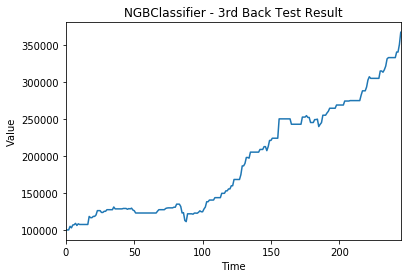

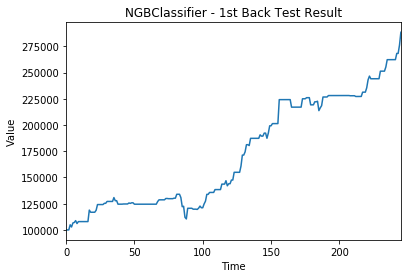

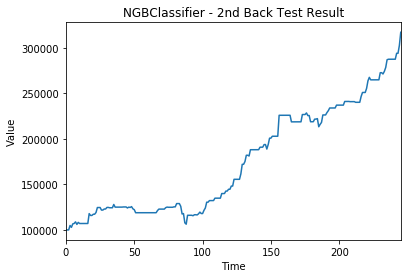

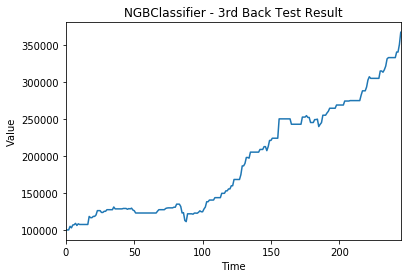

In [293]:
# model_name = 'LGBMClassifier'
# model = model_lgbm

# model_name = 'RFClassifier'
# model = model_rf

# model_name = 'CatB Classifier'
# model = model_catb

# model_name = 'XGB Classifier'
# model = model_xgb

# model_name = 'SoftVoting'
# model = model_soft_voting

# model_name = 'bagginf'
# model = model_bagging

model_name = 'NGBoost'
model = model_ngb

print('-'*100)
# score = model.score(test_X.values,test_y)
score = model.score(test_X.drop('Date', axis=1).values,test_y)
print('{} Score : {}'.format(type(model).__name__,score))
print('-'*100)
pred = get_pred_from_model(model)

mean_w = test.describe().loc['mean'].iloc[0:5]
mean_w
inv_w = 1/mean_w
weight = 10*inv_w/inv_w.drop('hold').sum()


backtest3(model, pred, weight)

# for iter_model in [model_lgbm, model_rf, model_catb, model_xgb, model_soft_voting, model_bagging]:
for func in [backtest1,backtest2,backtest3]:
    func(model,pred,weight)

In [102]:
# result1 = backtest1(model_lgbm, pred, weight)
# result2 = backtest2(model_lgbm, pred, weight)
# result3 = backtest3(model_lgbm, pred, weight)

In [103]:
result3['tomorrow_pct']=result3['adjusted_price'].pct_change().shift(periods=-1)*100

In [104]:
pd.options.display.max_rows=300

In [105]:
result3[['d2','d1','hold','u1','u2','buy_sell','tomorrow_pct','cash','stock','adjusted_price','value']]

,d2,d1,hold,u1,u2,buy_sell,tomorrow_pct,cash,stock,adjusted_price,value
0,0.744294,0.0557655,0.0532054,0.0488275,0.151113,,-0.574713,100000,0,34800,100000
1,0.0373967,0.0954967,0.037517,0.143611,0.723495,buy,-1.878613,0,2.89017,34600,100000
2,0.0795656,0.1883,0.0401593,0.077819,0.654315,buy,4.860088,0,2.89017,33950,98121.4
3,0.175565,0.108653,0.0423897,0.0894919,0.62629,buy,-1.966292,0,2.89017,35600,102890
4,0.116233,0.0988713,0.0373696,0.150597,0.634299,buy,3.724928,0,2.89017,34900,100867
5,0.44,0.0871495,0.0139726,0.0225017,0.450348,hold,0.414365,0,2.89017,36200,104624
6,0.286939,0.103682,0.0286191,0.0903605,0.519019,buy,1.650619,0,2.89017,36350,105058
7,0.130938,0.0295472,0.0179681,0.0982034,0.741312,buy,-2.571042,0,2.89017,36950,106792
8,0.186989,0.123815,0.0481789,0.148872,0.540324,buy,2.083333,0,2.89017,36000,104046
9,0.439724,0.108156,0.0378735,0.123766,0.328354,hold,-0.816327,0,2.89017,36750,106214


In [106]:
check_result = result3[['buy_sell','tomorrow_pct']][1:-1]
check_result.head()

,buy_sell,tomorrow_pct
1,buy,-1.878613
2,buy,4.860088
3,buy,-1.966292
4,buy,3.724928
5,hold,0.414365


In [107]:
def convert_pct(x):
    if x > 0:
        return 'buy'
    else:
        return 'sell'

In [108]:
check_result['true'] = check_result['tomorrow_pct'].map(convert_pct)
check_result.head()

,buy_sell,tomorrow_pct,true
1,buy,-1.878613,sell
2,buy,4.860088,buy
3,buy,-1.966292,sell
4,buy,3.724928,buy
5,hold,0.414365,buy


In [109]:
check_result.shape

(244, 3)

In [110]:
len(check_result[check_result.buy_sell==check_result.true])

99

In [111]:
check_result[check_result.buy_sell!=check_result.true][(check_result.tomorrow_pct>5)|(check_result.tomorrow_pct<-5)]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,buy_sell,tomorrow_pct,true
10,buy,-7.818930,sell
51,sell,6.416275,buy
84,buy,-6.678082,sell
86,buy,-8.592322,sell
88,hold,9.533469,buy
129,sell,7.599309,buy
140,hold,-6.788079,sell
145,buy,-9.123435,sell
155,hold,11.683168,buy
159,hold,-9.165303,sell


In [112]:
check_result[check_result.buy_sell==check_result.true][(check_result.tomorrow_pct>5)|(check_result.tomorrow_pct<-5)]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,buy_sell,tomorrow_pct,true
16,buy,10.140406,buy
56,sell,-7.188498,sell
91,sell,-5.088063,sell
102,buy,5.461394,buy
122,buy,5.321101,buy
125,sell,-7.612457,sell
128,buy,6.826568,buy
158,buy,5.526770,buy
200,buy,6.849315,buy


In [113]:
result3['true'] = result3['tomorrow_pct'].map(convert_pct)
result3.head()

,d2,d1,hold,u1,u2,cash,stock,adjusted_price,buy_sell,value,tomorrow_pct,true
0,0.744294,0.0557655,0.0532054,0.0488275,0.151113,100000,0,34800,,100000,-0.574713,sell
1,0.0373967,0.0954967,0.037517,0.143611,0.723495,0,2.89017,34600,buy,100000,-1.878613,sell
2,0.0795656,0.1883,0.0401593,0.077819,0.654315,0,2.89017,33950,buy,98121.4,4.860088,buy
3,0.175565,0.108653,0.0423897,0.0894919,0.62629,0,2.89017,35600,buy,102890,-1.966292,sell
4,0.116233,0.0988713,0.0373696,0.150597,0.634299,0,2.89017,34900,buy,100867,3.724928,buy


In [114]:
result3[(result3.buy_sell==result3.true)][(result3.tomorrow_pct>5)|(result3.tomorrow_pct<-5)][['d2','d1','hold','u1','u2','buy_sell',
                                                                                                 'tomorrow_pct','true']]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,d2,d1,hold,u1,u2,buy_sell,tomorrow_pct,true
16,0.19403,0.296506,0.0223148,0.311867,0.197597,buy,10.140406,buy
56,0.220686,0.425995,0.0737236,0.0760508,0.277269,sell,-7.188498,sell
91,0.290267,0.322067,0.0170111,0.0554737,0.332192,sell,-5.088063,sell
102,0.127733,0.0563743,0.0170304,0.104327,0.711566,buy,5.461394,buy
122,0.159813,0.257019,0.0693348,0.138152,0.445016,buy,5.321101,buy
125,0.814019,0.0427612,0.0181232,0.0652508,0.0779687,sell,-7.612457,sell
128,0.0461161,0.115948,0.0280505,0.0256535,0.812282,buy,6.826568,buy
158,0.101018,0.146764,0.0390303,0.0209167,0.731301,buy,5.526770,buy
200,0.0533641,0.201785,0.015372,0.031099,0.713752,buy,6.849315,buy


In [115]:
result3[result3.u2>0.9].sort_values(by='tomorrow_pct')

,d2,d1,hold,u1,u2,cash,stock,adjusted_price,buy_sell,value,tomorrow_pct,true


# rl_port data

In [116]:
result = pd.DataFrame(model.predict_proba(data.values),columns=['d2','d1','hold','u1','u2'])
profit = pd.DataFrame(profit_rate.values,columns=['profitrate'])
_pred = pd.DataFrame(model.predict(data.values),columns=['pred'])
_true = pd.DataFrame(target.values,columns=['true'])
port_data = pd.concat([result,profit,_pred,_true],axis=1)
port_data.index = Date
# rl_data.to_csv('rl_data.csv')
port_data.head(10)

,d2,d1,hold,u1,u2,profitrate,pred,true
Date,,,,,,,,
2015-09-02,0.245290,0.196990,0.053760,0.178858,0.325102,0.298507,2,1
2015-09-03,0.238379,0.221560,0.059358,0.193552,0.287150,-2.370370,2,-2
2015-09-04,0.275526,0.220149,0.050719,0.167612,0.285995,-1.208459,2,-1
2015-09-07,0.266234,0.209599,0.047737,0.182016,0.294414,-2.009274,2,-2
2015-09-08,0.256869,0.250512,0.051390,0.178221,0.263008,0.155039,2,0
2015-09-09,0.233190,0.252551,0.050768,0.183440,0.280050,1.406250,2,1
2015-09-10,0.275887,0.237503,0.056450,0.163407,0.266754,1.230769,-2,1
2015-09-11,0.284329,0.240557,0.059108,0.164280,0.251725,0.151515,-2,0
2015-09-14,0.312730,0.204132,0.054755,0.170548,0.257835,3.658537,-2,2


In [117]:
def get_index(df):
    mean_w = test.describe().loc['mean'].iloc[0:5]
    inv_w = 1/mean_w
    weight = 10*inv_w/inv_w.drop('hold').sum()
    strategy_index_3 = (weight.u1*df.u1+weight.u2*df.u2)-(weight.d1*df.d1+weight.d2*df.d2)
    df['index_{}'.format(company)] = strategy_index_3

In [118]:
get_index(port_data)
port_data.head()

,d2,d1,hold,u1,u2,profitrate,pred,true,index_엘앤에프
Date,,,,,,,,,
2015-09-02,0.245290,0.196990,0.053760,0.178858,0.325102,0.298507,2,1,0.229571
2015-09-03,0.238379,0.221560,0.059358,0.193552,0.287150,-2.370370,2,-2,0.165840
2015-09-04,0.275526,0.220149,0.050719,0.167612,0.285995,-1.208459,2,-1,-0.001236
2015-09-07,0.266234,0.209599,0.047737,0.182016,0.294414,-2.009274,2,-2,0.111974
2015-09-08,0.256869,0.250512,0.051390,0.178221,0.263008,0.155039,2,0,-0.044648


In [119]:
port_data.head(10)

,d2,d1,hold,u1,u2,profitrate,pred,true,index_엘앤에프
Date,,,,,,,,,
2015-09-02,0.245290,0.196990,0.053760,0.178858,0.325102,0.298507,2,1,0.229571
2015-09-03,0.238379,0.221560,0.059358,0.193552,0.287150,-2.370370,2,-2,0.165840
2015-09-04,0.275526,0.220149,0.050719,0.167612,0.285995,-1.208459,2,-1,-0.001236
2015-09-07,0.266234,0.209599,0.047737,0.182016,0.294414,-2.009274,2,-2,0.111974
2015-09-08,0.256869,0.250512,0.051390,0.178221,0.263008,0.155039,2,0,-0.044648
2015-09-09,0.233190,0.252551,0.050768,0.183440,0.280050,1.406250,2,1,0.046775
2015-09-10,0.275887,0.237503,0.056450,0.163407,0.266754,1.230769,-2,1,-0.096312
2015-09-11,0.284329,0.240557,0.059108,0.164280,0.251725,0.151515,-2,0,-0.144661
2015-09-14,0.312730,0.204132,0.054755,0.170548,0.257835,3.658537,-2,2,-0.073744


In [120]:
port_data['2019':]

,d2,d1,hold,u1,u2,profitrate,pred,true,index_엘앤에프
Date,,,,,,,,,
2019-01-02,0.346076,0.177478,0.057357,0.136690,0.282399,-1.424501,-2,-1,-0.151051
2019-01-03,0.215974,0.179760,0.058979,0.146455,0.398832,-1.020408,2,-1,0.346087
2019-01-04,0.225365,0.250649,0.061307,0.133990,0.328689,2.741703,2,2,-0.025945
2019-01-07,0.285858,0.203647,0.056425,0.141023,0.313047,-2.240896,2,-2,-0.027849
2019-01-08,0.246916,0.214552,0.065541,0.159902,0.313090,2.549575,2,2,0.090642
2019-01-09,0.306055,0.219515,0.055964,0.138339,0.280127,0.553250,-2,1,-0.177588
2019-01-10,0.247557,0.184368,0.054824,0.148000,0.365251,1.094391,2,1,0.216853
2019-01-11,0.263170,0.180110,0.053539,0.155805,0.347375,-2.040816,2,-2,0.193184
2019-01-14,0.262617,0.197923,0.067980,0.164273,0.307207,2.653631,2,2,0.107601


In [121]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
port_data.to_csv(('./output/{}_prob.csv'.format(company)))

In [122]:
port_data

,d2,d1,hold,u1,u2,profitrate,pred,true,index_엘앤에프
Date,,,,,,,,,
2015-09-02,0.245290,0.196990,0.053760,0.178858,0.325102,0.298507,2,1,0.229571
2015-09-03,0.238379,0.221560,0.059358,0.193552,0.287150,-2.370370,2,-2,0.165840
2015-09-04,0.275526,0.220149,0.050719,0.167612,0.285995,-1.208459,2,-1,-0.001236
2015-09-07,0.266234,0.209599,0.047737,0.182016,0.294414,-2.009274,2,-2,0.111974
2015-09-08,0.256869,0.250512,0.051390,0.178221,0.263008,0.155039,2,0,-0.044648
...,...,...,...,...,...,...,...,...,...
2019-12-23,0.303925,0.208095,0.067496,0.136008,0.284476,2.005013,-2,2,-0.144568
2019-12-24,0.312267,0.183251,0.061631,0.131481,0.311370,0.246305,-2,1,-0.065703
2019-12-26,0.303243,0.202416,0.061901,0.128988,0.303452,2.444988,2,2,-0.120300


In [123]:


# # tech_data.head()

# # rl_all_feature.loc[:,"rsi_14":'obv'].head()

# # roller = rl_all_feature.profit_rate.rolling(10)
# # vol_list = roller.std(ddof=0)
# # rl_all_feature['volatilty_10']= vol_list

# roller = port_data.profitrate.rolling(10)
# vol_list = roller.std(ddof=0)
# port_data['volatility_10'] = vol_list

# rl_feature_2 = pd.merge(port_data,tech_data, how='left', left_index=True, right_index=True)
# rl_feature_2 = pd.merge(rl_feature_2,rl_all_feature[['%change_usd_krw']], how='left', left_index=True, right_index=True)
# rl_feature_2 = pd.merge(rl_feature_2,rl_all_feature.loc[:,"rsi_14":'obv'], how='left', left_index=True, right_index=True)

# # rl_feature_2.head(20)

# # rl_feature_2.columns

# os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
# rl_feature_2.to_csv('./output/rl_feature_{}.csv'.format(company))

In [133]:
print(" 2 mean index : ",port_data[port_data.true==2]['2019':][f'index_{company}'].mean())
print(" 1 mean index : ",port_data[port_data.true==1]['2019':][f'index_{company}'].mean())
print(" 0 mean index : ",port_data[port_data.true==0]['2019':][f'index_{company}'].mean())
print("-1 mean index : ",port_data[port_data.true==-1]['2019':][f'index_{company}'].mean())
print("-2 mean index : ",port_data[port_data.true==-2]['2019':][f'index_{company}'].mean())


 2 mean index :  -0.0076344655591679845
 1 mean index :  0.014572250002231018
 0 mean index :  0.10152324400266038
-1 mean index :  -0.0036591516805994837
-2 mean index :  -0.021285188629236243


In [97]:
port_data['2019':]

,d2,d1,hold,u1,u2,profitrate,pred,true,index_엘앤에프
Date,,,,,,,,,
2019-01-02,0.704694,0.052799,0.053205,0.046230,0.143073,-1.424501,-2,-1,-1.123521
2019-01-03,0.035994,0.091914,0.037517,0.138223,0.696352,-1.020408,2,-1,1.432612
2019-01-04,0.076370,0.180738,0.040159,0.074694,0.628038,2.741703,2,2,0.769800
2019-01-07,0.168123,0.104047,0.042390,0.085698,0.599742,-2.240896,2,-2,0.773951
2019-01-08,0.111889,0.095177,0.037370,0.144969,0.610595,2.549575,2,2,1.144252
2019-01-09,0.433853,0.085932,0.013973,0.022187,0.444056,0.553250,2,1,-0.218987
2019-01-10,0.278727,0.100714,0.028619,0.087774,0.504165,1.094391,2,1,0.398718
2019-01-11,0.128585,0.029016,0.017968,0.096439,0.727992,-2.040816,2,-2,1.314137
2019-01-14,0.177980,0.117850,0.048179,0.141700,0.514292,2.653631,2,2,0.770182


In [98]:
port_data[port_data.true==2]['2019':]

,d2,d1,hold,u1,u2,profitrate,pred,true,index_엘앤에프
Date,,,,,,,,,
2019-01-04,0.076370,0.180738,0.040159,0.074694,0.628038,2.741703,2,2,0.769800
2019-01-08,0.111889,0.095177,0.037370,0.144969,0.610595,2.549575,2,2,1.144252
2019-01-14,0.177980,0.117850,0.048179,0.141700,0.514292,2.653631,2,2,0.770182
2019-01-24,0.189700,0.289890,0.022315,0.304908,0.193187,8.448541,1,2,0.324541
2019-01-31,0.365696,0.193383,0.046005,0.104974,0.289943,1.759531,-2,2,-0.333304
2019-02-01,0.057953,0.156300,0.059630,0.104100,0.622018,3.703704,2,2,0.965995
2019-02-18,0.388680,0.326129,0.005938,0.085573,0.193680,4.809052,-2,2,-0.963996
2019-02-22,0.462065,0.254899,0.010901,0.066796,0.205340,2.446043,-2,2,-0.974408
2019-03-20,0.208547,0.425206,0.010447,0.031467,0.324332,3.816794,-1,2,-0.823732
